# Assignment 3: Regression

## Q1.
We intend to design a machine learning system for predicting humidity using temperature values as feature. <br>
The following table shows average temperature values and their corresponding average humidity values for 12 months of a
year for a certain city.

![table](images/table.png)

### a. Write linear regression equation for the prediction system.

### $$ y = \theta_1x + \theta_0  $$

### b. Find predicted values for humidity i.e. $$ h(x^{(i)}) $$if θ0 = 53.95 and θ1 = −0.56.

### Ans. 
[46.054, 44.598, 42.918, 39.838, 39.894, 43.422, 47.398, 48.238,
       48.91 , 48.854, 48.07 , 46.894]

### c. Find the value of the cost function.

196.001817

### d. Find R-squared value for this model.

0.04750

### e. Propose two methods by which the R-squared value obtained in part c can be improved.

- The dataset is too small. Adding more samples could increase the result in even better results.
- Possibly adding more features or changign the model could imporve the R-squared value.

## Q2. 
Write a function in Python to calculate R-squared value, taking the list of actual output and list of predicted output as
inputs. 

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
temp = np.array([14.1, 16.7, 19.7, 25.2, 25.1, 18.8, 11.7, 10.2, 9.0, 9.1, 10.5, 12.6])
target = np.array([44.3, 50.4, 46.8, 33.7, 37.4, 54.2, 68.2, 69.0, 45.0, 51.3, 20.7, 24.4])

In [3]:
t0 = 53.95
t1 = -0.56

In [4]:
pred = t1*temp + t0
pred

array([46.054, 44.598, 42.918, 39.838, 39.894, 43.422, 47.398, 48.238,
       48.91 , 48.854, 48.07 , 46.894])

In [5]:
n = len(pred)
squared = (target-pred)**2
rss = sum(squared)
cost = 1/n * rss
cost

np.float64(196.00181733333335)

In [6]:
mean = target.mean()
tss = sum((target-mean)**2)
r_squared = 1-rss/tss
r_squared

np.float64(0.04750608140669732)

# Q3.
For problem 2 from the notebook N6_Linear Regression.ipynb, find R-squared (score) for the movie revenue prediction model using your function implemented in the previous problem and check if your results are same as the ones produced by the score method in the notebook.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib as plt
import seaborn as sns

movie_data = pd.read_csv("Datasets/Movie_Revenue_Dataset.csv")
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5773 entries, 0 to 5772
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Production_Budget  5773 non-null   int64
 1   Worldwide_Gross    5773 non-null   int64
dtypes: int64(2)
memory usage: 90.3 KB


In [8]:
def r_squared(target, pred):
    squared = (target-pred)**2
    rss = np.sum(squared, axis=0)
    mean = target.mean()
    tss = np.sum((target-mean)**2, axis=0)
    r_squared = 1-rss/tss
    return r_squared

In [9]:
X = movie_data[['Production_Budget']]
Y = movie_data[['Worldwide_Gross']]

In [10]:
r = LinearRegression()
r.fit(X,Y)
pred = r.predict(X)
r_squared(Y, pred)


Worldwide_Gross    0.545594
dtype: float64

Yes, tis similar <3

# Q4.
For problem 2 from the notebook N6_Linear Regression.ipynb, the alternate model uses a 80%-20% train-test split of data. Consider this result as model 1. Derive two more models with the following splits and determine which split
gives the best result.
- Model 2: 70%-30%
- Model 3: 90%-10%

In [11]:
trainX1, testX1, trainY1, testY1 = train_test_split(X, Y, random_state=2, test_size=0.3)
trainX2, testX2, trainY2, testY2 = train_test_split(X, Y, random_state=2, test_size=0.1)

In [12]:
r1 = LinearRegression()
r1.fit(trainX1,trainY1)
pred1 = r1.predict(testX1)
r_squared(testY1, pred1)

Worldwide_Gross    0.564206
dtype: float64

In [13]:
r2 = LinearRegression()
r2.fit(trainX2,trainY2)
pred2 = r2.predict(testX2)
r_squared(testY2, pred2)

Worldwide_Gross    0.554571
dtype: float64

Best one was 80/20

# Q5. 
In problem 2 of practice problem set 1, you worked on fish market dataset provided in file D4_Fish_Market_Dataset.csv.
You encoded all categorical data into numeric values. Take Weight as target and remaining 6 columns are features.

### a. Write equation for the hypothesis function h(x) for predicting Weight from features.

### $$ h(x) = \theta_6x + \theta_5x + \theta_4x + \theta_3x + \theta_2x + \theta_1x + \theta_0  $$

### b. Implement linear regression model defined in part a in Python. Print the values of all training parameters and R-squared value.

In [24]:
fish_data = pd.read_csv("Datasets/Normalized_Fish_Market_Dataset.csv")
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  159 non-null    int64  
 1   Species     159 non-null    int64  
 2   Weight      159 non-null    float64
 3   Length1     159 non-null    float64
 4   Length2     159 non-null    float64
 5   Length3     159 non-null    float64
 6   Height      159 non-null    float64
 7   Width       159 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 10.1 KB


In [25]:
X = fish_data.drop(columns=["Weight"])
Y = fish_data[["Weight"]]

In [27]:
lr_fish = LinearRegression().fit(X, Y)
lr_fish.score(X,Y)


0.9035691421370635

### c. Generate correlation heatmap for the model developed in part b and see if there are any features with potential sign of multicollinearity.

<Axes: >

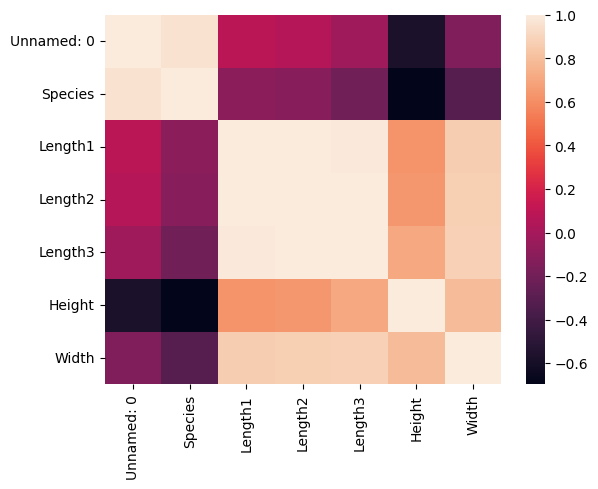

In [30]:
sns.heatmap(X.corr())

Species and height show signs of multicollinearity

### d. Write equation for polynomial hypothesis function h(x), adding a squared term for each feature. What is the total number of training parameters now?

### e. Implement polynomial regression model defined in part d in Python. Print the values of all training parameters and R-squared value.